## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [31]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [32]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [33]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [34]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [35]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [36]:
df.query('(group == "treatment" & landing_page == "old_page") |(group == "control" & landing_page == "new_page")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [38]:
df2 = df.query('(landing_page == "new_page" & group == "treatment") | (landing_page == "old_page" & group == "control") ')

In [39]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [40]:
df2['user_id'].nunique(), df2.shape

(290584, (290585, 5))

b. There is one **user_id** repeated in **df2**.  What is it?

In [41]:
(df2['user_id'].value_counts()).index[0]

773192

c. What is the row information for the repeat **user_id**? 

In [42]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [43]:
df2.drop(2893, axis=0,inplace=True)
df2[df2.loc[:,'user_id'] == 773192]

C:\Users\alejanma\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [44]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [45]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [46]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [47]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** On the basis of the above information, there is not much that can be said. So far we've only carried out the descriptive statistics and no inference can be drawn as there is no specific inference test been performed. It looks like there is not much difference between conversion rates from old and new page, but a more conclusive decission can be derived in the following two parts.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{null} : p_{new} - p_{old} <= 0$   
$H_{alt}  : p_{new} - p_{old} >  0$   

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [48]:
pnew = df2['converted'].mean()
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [49]:
pold = df2['converted'].mean()
pold

0.11959708724499628

c. What is $n_{new}$?

In [50]:
nnew = df2.query('landing_page == "new_page"').shape[0]
nnew

145310

d. What is $n_{old}$?

In [52]:
nold = df2.query('landing_page == "old_page"').shape[0]
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [51]:
new_page_converted = np.random.choice([0, 1], size=nnew, p=[1-pnew, pnew])
new_page_converted.mean()

0.1182644002477462

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [53]:
old_page_converted = np.random.choice([0, 1], size=nold, p=[1-pold, pold])
old_page_converted.mean()

0.11825928934289687

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [54]:
new_page_converted.mean() - old_page_converted.mean()

5.110904849336961e-06

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [55]:
p_diffs = []
for _ in range(10000):
    nmean = np.random.choice([0, 1], size=nnew, p=[1-pnew, pnew]).mean()
    omean = np.random.choice([0, 1], size=nold, p=[1-pold, pold]).mean()
    p_diffs.append(nmean-omean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

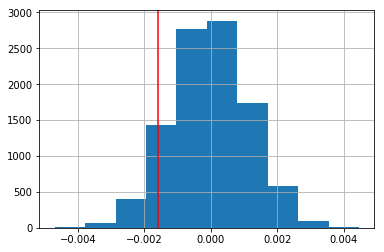

In [57]:
observedDiffInCsv = df2.query('landing_page == "new_page"')['converted'].mean() - df2.query('landing_page == "old_page"')['converted'].mean()
plt.hist(p_diffs);
plt.axvline(observedDiffInCsv,c='r')
plt.grid()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [56]:
pObserved = df2.query('landing_page == "new_page"')['converted'].mean() - df2.query('landing_page == "old_page"')['converted'].mean()
p_diffs = np.array(p_diffs)
print (pObserved)
sum(p_diffs > pObserved)/len(p_diffs)

-0.0015782389853555567


0.9093

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** From **_a to j_** we have been asked to build, under the null hypothesis, the sampling distribution of the difference in proportions in incremental steps.   
The particular technique followed to get the sampling distribution has been _bootstraping_. As far as the difference in proportions distribution is concerned there are some other ways in which the sampling distribution could have been calculated. As difference in proportions meets the central limit theorem we could have used a normal distribution with 0 mean and variance given by the variance of the difference in proportions sample.

Coming back to the question, what has been calculated under part j is the **p-value**. Or in other words the proportion or probability that we observe a specific value or a more extreme value, provided that the null hypothesis is true. The bootstrapped sampling distribution is centered around 0. This is because the null hypothesis assumes that conversion rate shows no difference between the new and old page. Therefore the observed difference in the original sample, that is -0.00157, or any value greater than that is very likely to have been generated by the distribution given by the null hypothesis. Since this value is very large and extremely likely to have been produced under the null hypothesis, therefore we don't have statistical evidence to reject the null hypothesis or **we fail to reject the null**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [58]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"')['converted'].count()
n_new = df2.query('landing_page == "new_page"')['converted'].count()
convert_old, convert_new, n_old, n_new, convert_old/n_old, convert_new/n_new

(17489, 17264, 145274, 145310, 0.1203863045004612, 0.11880806551510564)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [60]:
zscore, pvalue = sm.stats.proportions_ztest([convert_new,convert_old ],[n_new, n_old], alternative = 'larger')
zscore, pvalue

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** The z score indicates how many standard deviations the observed result is away from the mean. In this case the calculated value, -0.0015782389853555567, is 1.31 standard deviation lengths to the left. Since, alternative was set to _larger_ it means that most of the bell curve will be integrated and so the p-value will be large. These results obtained in part **m** are in line with what was calculated via bootstrapping. Since the p-value is very similar to the calculated earlier, we still fail to reject the null hypothesis 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [61]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group']).loc[:,'treatment']
df2.head()

C:\Users\alejanma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\alejanma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [62]:
y,X = df2['converted'], df2[['intercept','ab_page']]
logreg = sm.Logit(y,X)
results = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:22:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:** The p-value calculated for the coefficient of ab_page is 0.19. This is quite a high number and so we fail to reject the null hypothesis in this case. The null hypothesis for regression is that ab_page as explanatory variable is no better than chance alone. That is, ab_page and converted are independent variables. This can also be explained by looking at the 5% confidence interval. It can be seen that **0** is included within the 5% confidence interval which means both explanatory and response variables are independent. The result for regression is the same as for Part 2, that is we fail to reject the null. However the p-values are different. Null hypothesis for part 2 and part 3 are different so p-values are measuring different things therefore providing different values.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** Adding more factors to a model may result in a model that matches more closely what happens in reality. In general human behavior is quite hard to model, so the more explanatory variables available to us for analysis the better. For example we could use time of the day or whether it's a week day or weekend to check whether these have an impact on _conversion rate_. On the other hand adding more variables into the model may result in some issues. For example collinearity or multicollinearity, that is when two or more explanatory variables are related, can lead to a decrease in the accuracy of the regression coefficients.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [64]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [65]:
### Create the necessary dummy variables
df_new[['CA','UK']] = pd.get_dummies(df_new['country']).loc[:,['CA','UK']]
y,X = df_new.loc[:,'converted'], df_new.loc[:,['intercept','CA','UK']]
logreg = sm.Logit(y,X)
results = logreg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        11:22:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Answer:** It seems that the dummy variables that represent each country do not add any relevant information to the model and still I am unable to reject the null given the statistical information above. So in other words, knowing the country a-priori does not add any useful information to better predict whether an individual will convert or not.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [66]:
### Fit Your Linear Model And Obtain the Results
y,X = df_new.loc[:,'converted'], df_new.loc[:,['intercept','ab_page','CA','UK']]
logreg = sm.Logit(y,X)
results = logreg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:22:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**Answer:** When combining all the explanatory variables used so far no improvement can be observed. Still the p-value associated to the coefficients seems to be to high and does not improve model's classification accuracy. 

However, there is still more information contained in the original dataframe that has not yet been analysed. This information on time may be used in our model to better predict whether an individual may convert or not. I thought that we can get two new explanatory variables. First whether the day falls on a weekend or not. Second whether it's morning, afternoon or night. Let's see if our regression model is improved by these new variables

In [67]:
# Adding time related variables to our model
from datetime import datetime
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])
df_new['isWeekend'] = df_new['timestamp'].apply(lambda x: 1 if x.day_name() in ['Saturday','Sunday'] else 0)
df_new['isMorning'] = df_new['timestamp'].apply(lambda x: 1 if x.timetuple().tm_hour in range(5,12) else 0)
df_new['isAfternoon'] = df_new['timestamp'].apply(lambda x: 1 if x.timetuple().tm_hour in range(12,21) else 0)
df_new['isNight'] = df_new['timestamp'].apply(lambda x: 1 if x.timetuple().tm_hour in [x%24 for x in range(21,24+5)] else 0)

In [68]:
y,X = df_new.loc[:,'converted'], df_new.loc[:,['intercept','isWeekend','isMorning','isNight']]
logreg = sm.Logit(y,X)
results = logreg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:               2.499e-05
Time:                        11:22:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1500
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9869      0.010   -199.797      0.000      -2.006      -1.967
isWeekend      0.0006      0.013      0.044      0.965      -0.025       0.026
isMorning     -0.0006      0.014     -0.040      0.968      -0.028       0.027
isNight       -0.0283      0.014     -2.073      0.038      -0.055      -0.002
==============================================================================
"""

**Answer:** It seems that there is a coefficient for which the p-value has become statistically significant. This has to do with the information provided by the newly created column _isNight_. It can be seen that the confidence interval does not include **0**. In words the results show that the number of conversions is 1.03 times less likely if a user is shown the new page at night than in the afternoon keeping all other variables constant.

<a id='conclusions'></a>
## Conclusions

This document has carried out an analysis on whether it makes sense for a company to fully deploy a new landing page. Results obtained both in parts 2 (hypothesis testing) and 3 (logistic regression) show no statistical evidence to think that the new page will result in more conversions than the old page. Logistic regression showed a parameter that may fall into the category of statistically significant. However, this parameter stresses the fact that it may be even more benefitial for the company to show the old page at night as there is evidence that old page will result in more converts than the new one.